In [1]:
import sys
import pickle
import numpy as np
import pandas as pd
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
df = pd.read_pickle('tmp/new_tensor_results_df.pkl')
df['mtx_is_dirichlet'] = df['mtx_is_dirichlet'].apply(lambda x: len(x) > 0)

In [3]:
df = pd.read_pickle('tmp/new_tensor_results_df.pkl')
df['mtx_is_dirichlet'] = df['mtx_is_dirichlet'].apply(lambda x: len(x) > 0)

old_df = pd.read_pickle('tensor_results_df.pkl')
old_df['mtx_is_dirichlet'] = old_df['mtx_is_dirichlet'].apply(lambda x: len(x) > 0)

In [6]:
foo = df.loc[(df['model_type'] == 'prgds-v2') & 
             (df['theta_eps'] == 1) & 
             (df['nu_eps'] == 1) & 
             (df['mtx_is_dirichlet'] == True) &
             (df.experiment.apply(lambda x: 'icews' in x)) &
             (df.experiment.apply(lambda x: 'structured' not in x)) & 
             (df.experiment.apply(lambda x: 'periods6' in x))]
foo

,avg_after,binary,block_sample_Theta_and_H,block_sample_nu_and_g,core_shp,diagonal,eps,experiment,f-gll,f-gll-nz,...,s-mre,s-mre-nz,s-mre-z,s-rmse,s-rmse-nz,s-rmse-z,seed,stationary,tau,theta_eps
114,20.0,0.0,1.0,1.0,[100],0.0,0.1,/mnt/nfs/work1/wallach/aschein/results/thesis/...,0.9620661885443047,0.0037184062526073075,...,0.010289058450274143,0.5484468179007711,0.007951876468541712,0.8136825544676773,12.278253741122482,0.1011626147037535,617.0,1.0,1.0,1.0
143,20.0,0.0,1.0,1.0,[100],0.0,0.1,/mnt/nfs/work1/wallach/aschein/results/thesis/...,0.9154369877001494,3.0801760788047257e-08,...,0.01248148880829115,0.5460305582278359,0.009340833007065629,0.6924751387741968,8.943925094141818,0.1071124794407496,617.0,1.0,1.0,1.0
144,20.0,0.0,1.0,1.0,[100],0.0,0.1,/mnt/nfs/work1/wallach/aschein/results/thesis/...,0.9617891604766804,0.0033251004721278725,...,0.012454235589976187,0.5460162958061568,0.009313503320393459,0.6847948205140324,8.841731337579084,0.1073865631404326,781.0,1.0,1.0,1.0


In [6]:
bptf_df = pd.read_pickle('bptf_results_df.pkl')
exp = bptf_df.experiment.unique()[0]

theta_eps = 0
nu_eps = 1
mtx_is_dirichlet = True
dataset = 'gdelt'
metric = 'perp_f_nz'
for exp in bptf_df.experiment.unique():
    bptf_val = float(bptf_df[bptf_df['experiment'] == exp][metric])
    
    foo = df.loc[(df['model_type'] == 'prgds-v2') & 
                 (df['theta_eps'] == theta_eps) & 
                 (df['nu_eps'] == nu_eps) & 
                 (df['mtx_is_dirichlet'] == mtx_is_dirichlet) &
                 (df['experiment'] == exp)]
    vals = np.array([float(x) for x in foo[metric]]) / bptf_val
    print(vals)
#     if len(vals) == 0:
#         print(foo)
#         print(exp)



# metric = 'perp_f_nz'
# foo[['experiment', metric]]
# bptf_df[['experiment', metric]]

[0.04315601 0.04472522]
[0.04216787 0.04294643]
[0.04313111 0.04297363]
[0.04251492 0.04384948]
[0.00135328 0.00150667]
[0.04171122 0.04063248]
[0.00138753 0.00126463]
[0.04078903 0.04203943]


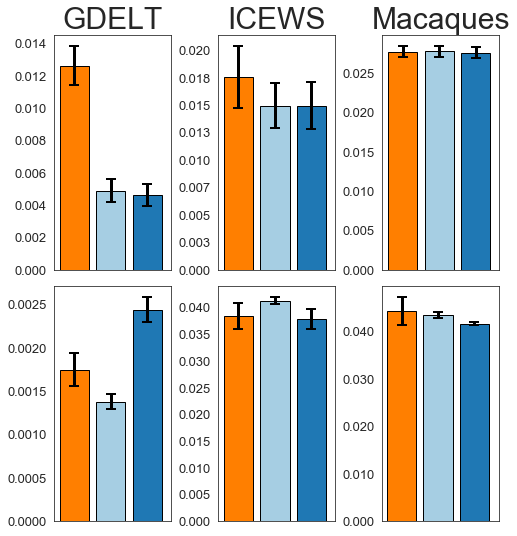

In [16]:
sns.set_style('white')

PGDS_COLOR = sns.color_palette("Paired")[7]
GPDPFA_COLOR = sns.color_palette("Paired")[5]
BPTF_COLOR = sns.color_palette("Paired")[10]
PRGDS0_COLOR = sns.color_palette("Paired")[0]
PRGDS1_COLOR = sns.color_palette("Paired")[1]

tPlot, axes = plt.subplots(nrows=2,
                           ncols=3, 
                           sharex=True, 
                           gridspec_kw={'height_ratios': [1,1],
                                        'width_ratios': [1,1,1]},
                           figsize=(7, 7.25))

width=2
space=width/4.

lines = []
labels = []
for row, metric in enumerate(['perp_s_nz', 'perp_f_nz']):
    for col, dataset in enumerate(['gdelt', 'icews', 'monkeybrains']):
        ax = axes[row][col]
        
        if row == 1 and col == 2:
            width = 2.1
        xtick = 0
        foo = df.loc[(df['model_type'] == 'pgds') & 
                     (df.experiment.apply(lambda x: dataset in x)) &
                     (df.experiment.apply(lambda x: 'structured' not in x)) & 
                     (df.experiment.apply(lambda x: 'periods6' in x))]

        vals = []
        for exper in foo.experiment.unique():
            bptf_val = float(bptf_df[bptf_df['experiment'] == exper][metric])
            vals += [x/bptf_val for x in foo[foo['experiment'] == exper] [metric]]
    

        label = 'PGDS'
        line = ax.bar(xtick, np.nanmean(vals), yerr=np.nanstd(vals), label='PGDS', 
                      color=PGDS_COLOR, width=width, error_kw=dict(lw=3, capsize=5, capthick=2),
                      edgecolor='k')
        
        if row == 0 and col == 0:
            labels.append(label)
            lines.append(line)

        xtick += width + space
        for theta_eps, nu_eps, mtx_is_dirichlet in it.product([0,1],[1],[True]):

            foo = df.loc[(df['model_type'] == 'prgds-v2') & 
                         (df['theta_eps'] == theta_eps) & 
                         (df['nu_eps'] == nu_eps) & 
                         (df['mtx_is_dirichlet'] == mtx_is_dirichlet) &
                         (df.experiment.apply(lambda x: dataset in x)) &
                         (df.experiment.apply(lambda x: 'structured' not in x)) & 
                         (df.experiment.apply(lambda x: 'periods6' in x))]

            vals = []
            for exper in foo.experiment.unique():
                bptf_val = float(bptf_df[bptf_df['experiment'] == exper][metric])
                vals += [x/bptf_val for x in foo[foo['experiment'] == exper] [metric]]

            color = PRGDS0_COLOR if theta_eps==0 else PRGDS1_COLOR

            line = ax.bar(xtick, np.nanmean(vals), yerr=np.nanstd(vals), label=label, 
                          color=color, width=width,error_kw=dict(lw=3, capsize=5, capthick=2),
                          edgecolor='k')
            xtick += width + space
        
            if row == 0 and col == 0:
                labels.append(label)
                lines.append(line)
            
        if col in [1,2]:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

        if row == 0:
            title = dataset
            if title == 'gdelt':
                title = 'GDELT'
            elif title == 'icews':
                title = 'ICEWS'
            elif title == 'monkeybrains':
                title = 'Macaques'
            ax.set_title(title, fontsize=30)
        
        ax.set_xticks(np.arange(xtick))
        ax.set_xticklabels(())
        ax.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout(pad=0.0, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.4, hspace=0.07)

plt.savefig('test_tensor_results.pdf', dpi=100, pad_inches=0.0, format='pdf')